# 43

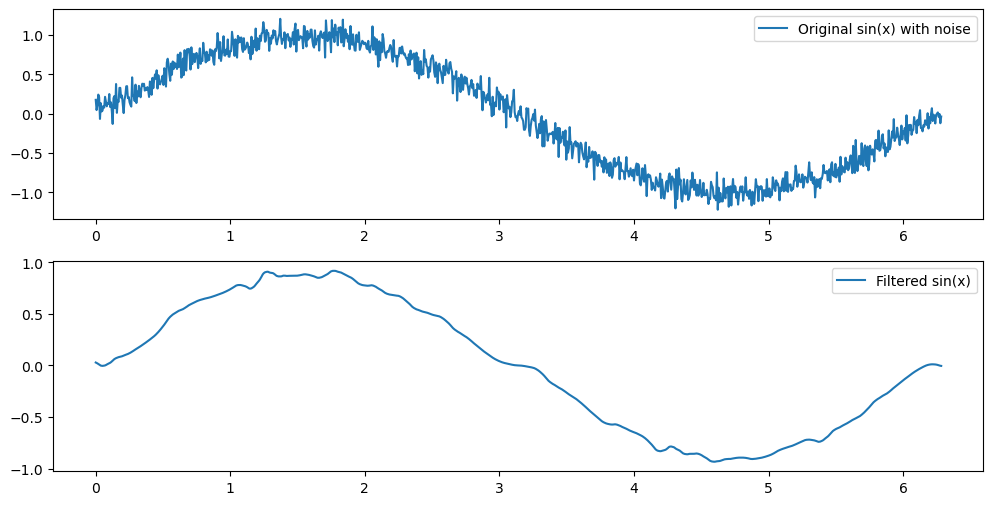

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pywt

# Создание синусоиды с шумом
np.random.seed(0)
x = np.linspace(0, 2*np.pi, 1000)
y = np.sin(x) + np.random.normal(0, 0.1, 1000)

# Вейвлет фильтрация
w = pywt.Wavelet('db4')
coeffs = pywt.wavedec(y, w, level=4)

threshold = 0.4
coeffs_filt = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]

y_filt = pywt.waverec(coeffs_filt, w)

# Построение графиков
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(x, y, label='Original sin(x) with noise')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(x, y_filt, label='Filtered sin(x)')
plt.legend()

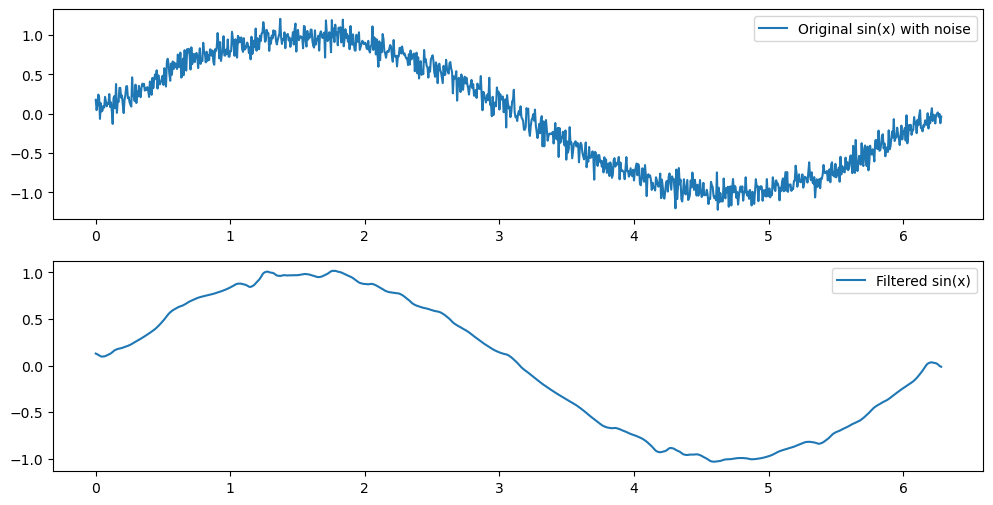

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pywt

# Создание синусоиды с шумом
np.random.seed(0)
x = np.linspace(0, 2*np.pi, 1000)
y = np.sin(x) + np.random.normal(0, 0.1, 1000)

# Вейвлет фильтрация
w = pywt.Wavelet('db4')
coeffs = pywt.wavedec(y, w, level=4)

threshold = 0.4
coeffs_filt = [pywt.threshold(c, threshold, mode='hard') for c in coeffs]

y_filt = pywt.waverec(coeffs_filt, w)

# Построение графиков
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(x, y, label='Original sin(x) with noise')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(x, y_filt, label='Filtered sin(x)')
plt.legend()

# 44

7.00372778754293


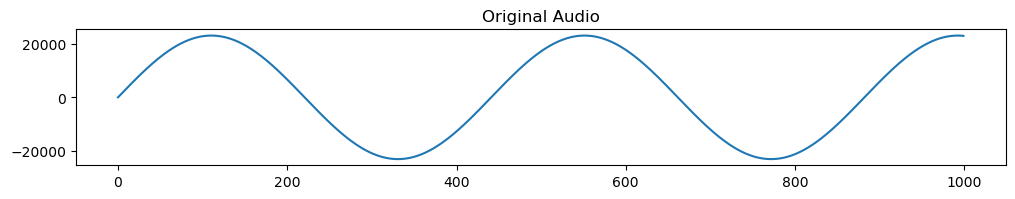

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import pywt
from scipy import signal

# Загрузка аудиофайла
sample_rate, audio_data = wav.read("audio.wav")

# Генерация гауссовского шума в диапазоне частот 15-22 кГц с SNR=1
n = len(audio_data)
fft_audio = np.fft.fft(audio_data)
freqs = np.fft.fftfreq(n, d=1/sample_rate)
mask = (np.abs(freqs) >= 15000) & (np.abs(freqs) <= 22000)
noise_power = np.sum(np.abs(fft_audio[mask])**2)
noise_var = noise_power / (np.sum(np.abs(fft_audio)**2) / n) * len(freqs)
noise = np.random.normal(0, np.sqrt(noise_var), n)
print(noise.max())
audio_data_noisy = audio_data + noise*2500

# НЧ фильтрация с помощью вейвлетов Добеши db4 и мягкого порогового значения
w = pywt.Wavelet('db4')
coeffs = pywt.wavedec(audio_data_noisy, w, level=4)

threshold = 12000  # Пороговое значение для мягкой фильтрации
coeffs_filt_soft = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]
audio_data_filt_soft = pywt.waverec(coeffs_filt_soft, w)

# НЧ фильтрация с помощью вейвлетов Добеши db4 и жесткого порогового значения
threshold = 15000  # Пороговое значение для жесткой фильтрации
coeffs_filt_hard = [pywt.threshold(c, threshold, mode='hard') for c in coeffs]
audio_data_filt_hard = pywt.waverec(coeffs_filt_hard, w)

# Визуализация результатов
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(audio_data[:1000])
plt.title('Original Audio')

plt.show()

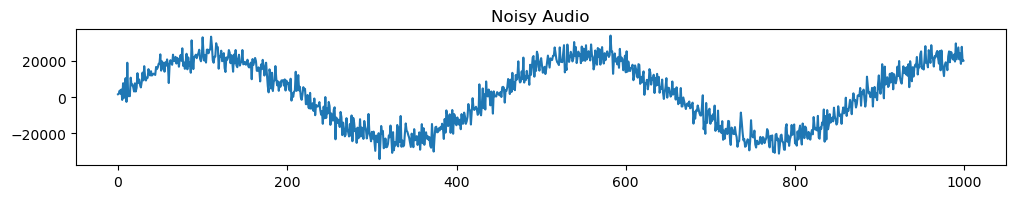

In [49]:
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(audio_data_noisy[:1000])
plt.title('Noisy Audio')

plt.show()

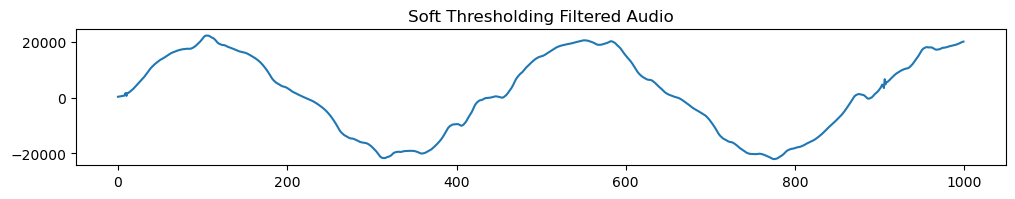

In [50]:
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 3)
plt.plot(audio_data_filt_soft[:1000])
plt.title('Soft Thresholding Filtered Audio')


plt.show()

Text(0.5, 1.0, 'Hard Thresholding Filtered Audio')

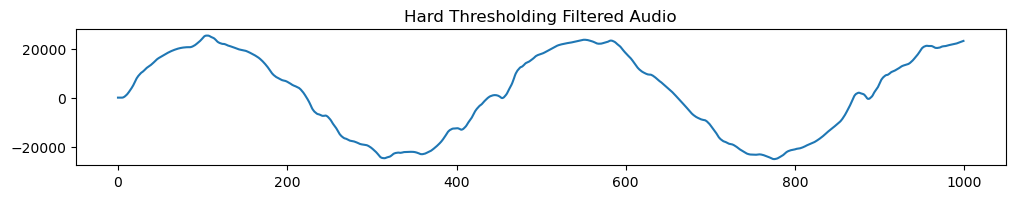

In [51]:
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(audio_data_filt_hard[:1000])
plt.title('Hard Thresholding Filtered Audio')

# 45

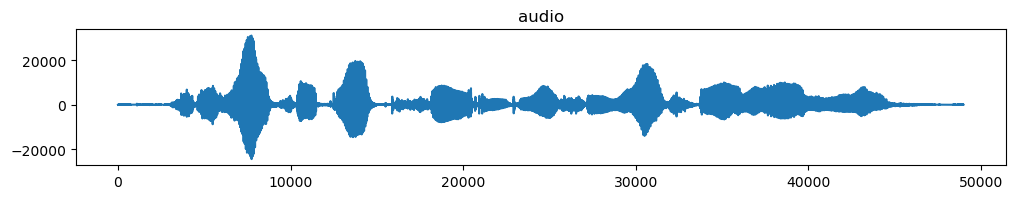

In [60]:
l = audio_data_noisy.shape[0]
w = 512
hop = 256
nz = [0,0,0,0]

sample_rate, audio_data = wav.read("clean_speech.wav")

plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(audio_data)
plt.title('audio')



coefs_a3=pywt.downcoef('a',audio_data_noisy[0:2*w], 'db20', mode='symmetric', level=3)
coefs_d3=pywt.downcoef('d',audio_data_noisy[0:2*w], 'db20', mode='symmetric', level=3)
    
coefs_a4=pywt.downcoef('a',audio_data_noisy[0:2*w], 'db20', mode='symmetric', level=4)
coefs_d4=pywt.downcoef('d',audio_data_noisy[0:2*w], 'db20', mode='symmetric', level=4)

dw3 = 1/(4*w)*np.sum(coefs_d3**2)
dw4 = 1/(4*w)*np.sum(coefs_d4**2)


for i in range(4*hop,l,hop):        
    coefs_a3=pywt.downcoef('a',audio_data_noisy[i:i+w], 'db20', mode='symmetric', level=3)
    coefs_d3=pywt.downcoef('d',audio_data_noisy[i:i+w], 'db20', mode='symmetric', level=3)
    
    coefs_a4=pywt.downcoef('a',audio_data_noisy[i:i+w], 'db20', mode='symmetric', level=4)
    coefs_d4=pywt.downcoef('d',audio_data_noisy[i:i+w], 'db20', mode='symmetric', level=4)

    dy3 = 1/(w)*np.sum(coefs_d3**2)
    dy4 = 1/(w)*np.sum(coefs_d4**2)
    if(dy3 + dy4 > 1.8*(dw3 + dw4)):
        nz.append(1)
    else:
        nz.append(0)

In [61]:
str(nz)

'[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,

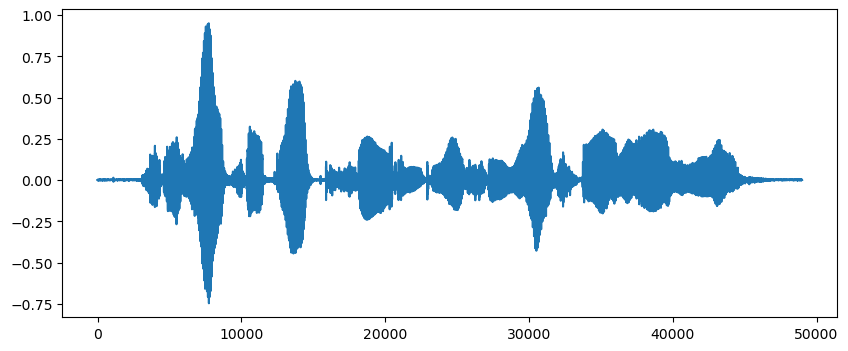

In [113]:
import librosa
l = audio_data_noisy.shape[0]
w = 50
hop = 50
nz = []

audio_data, sample_rate = librosa.load("clean_speech.wav", sr=None)#wav.read("clean_speech.wav")
plt.figure(figsize=(10, 4))
plt.plot(audio_data)
plt.show()

f_sil = 0
f_stat = 0
f_b2 = 0
f_bl = 0

P = 2
alpha = 1/2
L = 4
T1 = 10**(-10)
T2 = 10**(-4)
T3 = T4 = 10**(-5)
E_last = np.zeros(L)
delta_last = 0
B_last = np.zeros(L+1)

for i in range(0,l,hop):     
    E = []
    for j in range(1,L+1):
            coefs_d=pywt.downcoef('d',audio_data[i:i+w], 'db4',mode='symmetric', level=j)
            #print(coefs_d)
            E.append(np.sum(coefs_d**2))
    E = np.array(E)
    #print(E)
    coefs_al =pywt.downcoef('a',audio_data[i:i+w], 'db4', mode='symmetric', level=L)
    #print(coefs_al.shape)
    El1 = np.sum(coefs_al**2)

    if(np.sum(E) + El1 < T1):
        f_sil = 1
    else:
        f_sil = 0
    #print(E, E_last)
    delta = np.sqrt(1/L*(np.sum((E - E_last)**2)))
    #print(delta)
    if(delta < T2 and delta_last < T2):
        f_stat = 1
    else:
        f_stat = 0
    delta_last = delta.copy()
    E_last = E.copy()

    B =  np.zeros(L)
    for j in range(1,4):
        if(B_last[j] > E[j]):
            B[j] = E[j]
        else:
            B[j] = 1/2*E[j] + 1/2*B[j]
    B_last = B
    lc = audio_data[i:i+w]
    lc1 = lc[:len(lc)//2]
    lc2 = lc[len(lc)//2:]
    coefs_d1=pywt.downcoef('d',lc1, 'db4', mode='symmetric', level=2)
    E1 = np.sum(coefs_d1**2)

    coefs_d2=pywt.downcoef('d',lc2, 'db4', mode='symmetric', level=2)
    E2 = np.sum(coefs_d2**2)

    if(E1 - B[1] < T3 and E2 - B[1] < T3):
        f_b2 = 1
    else:
        f_b2 = 0

    if(E[L-1] - B[L-1] < T4):
        f_bl = 1
    else:
        f_bl = 0
        
    #print([f_sil,f_stat,f_b2,f_bl])
    if(not (f_sil or (f_stat and f_b2 and f_bl))):
        nz.append(1)
    else:
        nz.append(0)

In [114]:
str(nz)

'[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# 46

libpng warning: iCCP: known incorrect sRGB profile


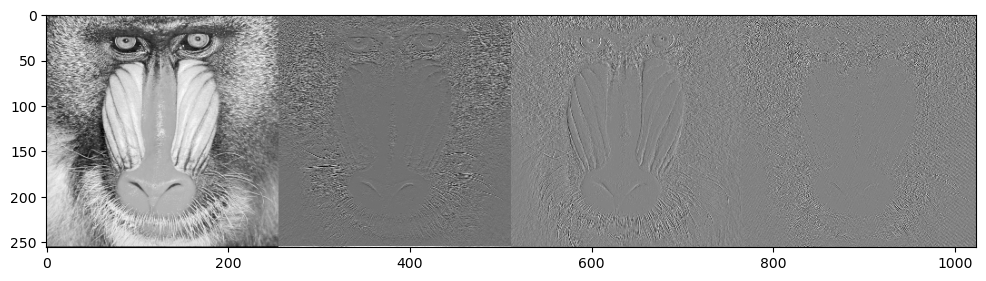

In [115]:
import cv2
import numpy as np

# Загрузка изображения
img = cv2.imread('baboon.png', cv2.IMREAD_GRAYSCALE)

# Выполнение дискретного вейвлет преобразования
coeffs = pywt.dwt2(img, 'haar')

# Преобразование коэффициентов в градации серого
cA, (cH, cV, cD) = coeffs
cA = cv2.normalize(cA, None, 0, 255, cv2.NORM_MINMAX)
cH = cv2.normalize(cH, None, 0, 255, cv2.NORM_MINMAX)
cV = cv2.normalize(cV, None, 0, 255, cv2.NORM_MINMAX)
cD = cv2.normalize(cD, None, 0, 255, cv2.NORM_MINMAX)

# Объединение коэффициентов в одно изображение
merged = np.hstack((cA, cH, cV, cD))

fig, axes = plt.subplots(1, 1, figsize=(12, 6))

axes.imshow(merged, cmap='gray')